# Optimizing Portfolios


## Python optimizers

Optimizers is one of the most important library of a Machine Learning (ML) framowork. Most of ML models are 
formuled as an optimization problems, i.e. minimizing a given cost function. Historically, __Gradient Descent__ was one 
of the first optmization methods used for accomplishing such task. 

__Gradient Descent__ is based on the observation that if a 
multivariate function $f()$ is defined and differentiable in a neighborhood of a given point $a$ then for $\alpha$ small 
enough  

$$f(a) \geq f \big( a-\alpha \bigtriangledown f(a) \big)$$

and if $$f(a) = f\big( a-\alpha \bigtriangledown f(a) \big)$$ if and only if $\alpha=0$ then $a$ is a __local minimum__. Also, 
__if $f()$ is a convex function__ then $a$ is also a __global minimum__. 

One of the main problems with __Gradient Descent__ is that it needs for each iteration you to provide $\alpha$ also 
known as __learning rate__. If $\alpha$ is too small you are going to converge too slowly. On the other hand, if $\alpha$
is too large you might diverge from the local optimum. 

There are more sophisticated algorithms than Gradient Descent that are able to select the best learning 
rate automatically and, hence, for which you only need to provide 
* $f()$, i.e. the cost-function  
* $\bigtriangledown f()$, i.e. the gradient 

The most popular of these algorithms are 
* [Conjugate Gradient](https://en.wikipedia.org/wiki/Conjugate_gradient_method)
* [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)
* [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)

Python offers the package [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html) 
where to minimize a function the following methods are available:
* minimize(method=’Nelder-Mead’), usually applied to nonlinear optimization problems 
for which derivatives may not be known 
* minimize(method=’Powell’), usually applied to functions that need not be differentiable, 
and no derivatives are taken
* minimize(method=’CG’), a.k.a. _Conjugate Gradient_ (see above)
* minimize(method=’BFGS’), see above 
* minimize(method=’Newton-CG’), variant of Conjugate Gradient
* minimize(method=’L-BFGS-B’), see above L-BFGS
* minimize(method=’TNC’)
* minimize(method=’COBYLA’), i.e. _Constrained optimization by linear approximation_  is 
a numerical optimization method for constrained problems where the derivative of the 
objective function is not known, invented by Michael J. D. Powell.
* minimize(method=’SLSQP’), i.e. _Sequential quadratic programming_ is an 
iterative method for nonlinear optimization.
* minimize(method=’dogleg’)
* minimize(method=’trust-ncg’)

Let's see these algorithms in action.  

### Parabola


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo 


def parab(X):
    ## X = 2 is the min
    Y = (X - 2)**2 + 1.5 
    return Y

initial_guess = 3
opt_methods_no_Jacobian = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP']
mins = [spo.minimize(parab,initial_guess,method=om,) for om in opt_methods_no_Jacobian]

min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian,
 'min' : [m.x for m in mins]
  }).set_index('Method')
min_df

,min
Method,
Nelder-Mead,[2.00002441406]
Powell,1.9999999999683606
CG,[1.99]
BFGS,[1.99999999056]
L-BFGS-B,[2.0]
TNC,[2.00000000168]
COBYLA,2.0001
SLSQP,[2.0]


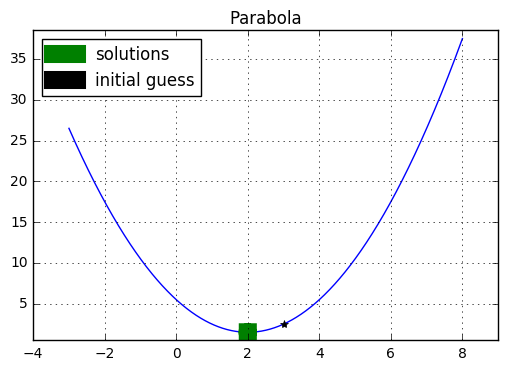

In [2]:
def plot_mins(f,min_df,xmin=-5,xmax=5,ticks=1000,title='',xguess=3,legend_pos='upper left'):
    x = np.linspace(xmin, xmax, ticks)
    y = f(x)
    
    plt.plot(x, y ,color='b')
    
    plt.plot(min_df, f(min_df),'g',linewidth=13,marker="+",label='solutions')
    
    plt.plot(xguess, f(xguess),'black',linewidth=13,marker="*",label='initial guess')
    
    plt.axis([xmin-1, xmax+1, y.min()-1, y.max()+1])
    
    plt.title(title)
    
    plt.grid(True)
    plt.legend(loc=legend_pos)
    
    plt.show()
    
    
plot_mins(f=parab,min_df=min_df,xmin=-3,xmax=8,title='Parabola')

### Non-Convex example

In [3]:
def non_convex_1(X):
    if type(X) is float:
        if X <=0 or X >=4:
            return 5.5
        else: 
            return (X - 2)**2 + 1.5 
    else:
        Y = (X - 2)**2 + 1.5 
        Y[np.logical_or(X <= 0 , X >=4)] = 5.5
        return Y

initial_guess = 4.5
mins = [spo.minimize(non_convex_1,initial_guess,method=om,) for om in opt_methods_no_Jacobian]

min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian,
 'min' : [m.x for m in mins]
  }).set_index('Method')
min_df

,min
Method,
Nelder-Mead,[4.5]
Powell,7.087928961545842
CG,[4.5]
BFGS,[4.5]
L-BFGS-B,[4.5]
TNC,[4.5]
COBYLA,4.5
SLSQP,[4.5]


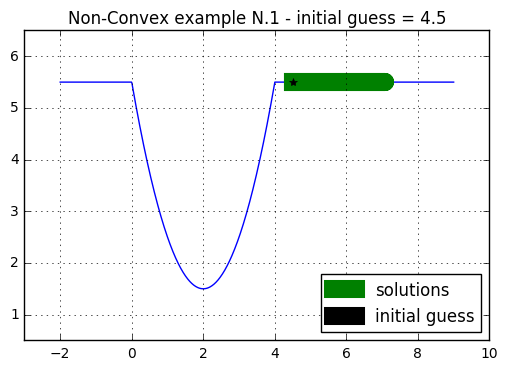

In [4]:
plot_mins(f=non_convex_1,min_df=min_df,xmin=-2,xmax=9,title='Non-Convex example N.1 - initial guess = 4.5',
          xguess=4.5,legend_pos='lower right')

In [5]:
initial_guess = 3.9
mins = [spo.minimize(non_convex_1,initial_guess,method=om,) for om in opt_methods_no_Jacobian]

min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian,
 'min' : [m.x for m in mins]
  }).set_index('Method')
min_df

,min
Method,
Nelder-Mead,[1.99998779297]
Powell,1.9999999999683606
CG,[1.99999984958]
BFGS,[2.00000003039]
L-BFGS-B,[1.99999996669]
TNC,[1.99999999867]
COBYLA,1.99989765625
SLSQP,[2.0]


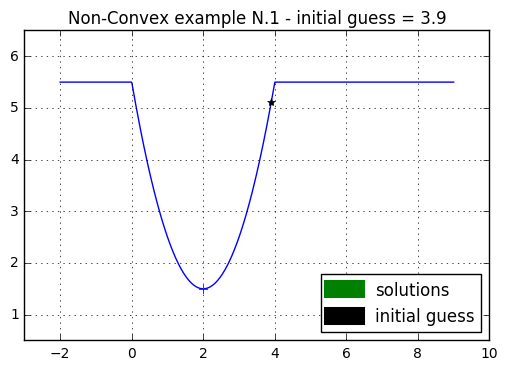

In [6]:
plot_mins(f=non_convex_1,min_df=min_df,xmin=-2,xmax=9,title='Non-Convex example N.1 - initial guess = 3.9',
          xguess=3.9,legend_pos='lower right')

The problem with such __function__ is the fact it is __not convex__. Hence, starting from initial guess 
x = 3.9 the above optimizers are able to find the global minimum. On the contrary, starting from initial guess x = 4.5 
no optmizer is able to find the global minimum. 

### Basin Hopping and Simulated Annealing
For solving this optimization problem we need something more than the above optmiziation methods. 
For instance, __simulated annealing__ is one of the most widely used algorithms for finding the global minimum 
of a multivariable function for different complex systems. In __scipy.optimize__ __simulated annealing__ has been 
replaced by __Basin Hopping__ that is a global optimization framework  
particularly suited for multivariable multimodal optimization problems 

In [7]:
from scipy.optimize import basinhopping
res = basinhopping(non_convex_1, 4.5, minimizer_kwargs={"method": "BFGS"},niter=200)

In [8]:
res.x

array([ 2.00000001])

We can see that Basin Hopping is able to find the global minimum instead of previous methods. 

### More dimensions, contraints and bounds  

Let us consider the problem of minimizing the Rosenbrock function. 
This function (and its respective derivatives) is implemented in rosen

In [9]:
from scipy.optimize import minimize, rosen, rosen_der

In [10]:
mins = [spo.minimize(rosen,[1.3, 0.7, 0.8, 1.9, 1.2],method=om) for om in opt_methods_no_Jacobian]

min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian,
 'min' : [m.x for m in mins], 
  'min_value': [rosen(m.x) for m in mins]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
min_df

,min,min_value
Method,,
Powell,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.696763e-22
L-BFGS-B,"[0.999999569191, 0.999999146161, 0.99999833610...",1.504062e-11
BFGS,"[0.999999245546, 0.999998516729, 0.99999706458...",4.582239e-11
CG,"[0.999998258204, 0.99999652201, 0.99999303492,...",2.587047e-10
SLSQP,"[0.999996799614, 0.999995480491, 0.99999335775...",2.434160e-09
TNC,"[0.999971153807, 0.999943162109, 0.9998872987,...",6.736061e-08
Nelder-Mead,"[0.999101151259, 0.998209232287, 0.99646345959...",6.617482e-05
COBYLA,"[1.03328356885, 1.06781943615, 1.14060138059, ...",1.166637e-01


We can see that all optimizers provide close minima although __Powell__ makes a better job this time. 
Let's test __Basin Hopping__

In [11]:
res = basinhopping(rosen, [1.3, 0.7, 0.8, 1.9, 1.2], minimizer_kwargs={"method": "BFGS"},niter=200)
print(">>> basinhopping min: "+str(res.x)+" - min_value:"+str(rosen(res.x)))

>>> basinhopping min: [ 0.99999967  0.9999993   0.99999876  0.99999751  0.99999518] - min_value:1.35681803995e-11


Pretty close the other ones. 
Let's concatenate results. 

In [12]:
min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian+['Basin Hopping'],
 'min' : [m.x for m in mins]+[res.x], 
  'min_value': [rosen(m.x) for m in mins]+[rosen(res.x)]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
min_df

,min,min_value
Method,,
Powell,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.696763e-22
Basin Hopping,"[0.999999671333, 0.999999298452, 0.99999876249...",1.356818e-11
L-BFGS-B,"[0.999999569191, 0.999999146161, 0.99999833610...",1.504062e-11
BFGS,"[0.999999245546, 0.999998516729, 0.99999706458...",4.582239e-11
CG,"[0.999998258204, 0.99999652201, 0.99999303492,...",2.587047e-10
SLSQP,"[0.999996799614, 0.999995480491, 0.99999335775...",2.434160e-09
TNC,"[0.999971153807, 0.999943162109, 0.9998872987,...",6.736061e-08
Nelder-Mead,"[0.999101151259, 0.998209232287, 0.99646345959...",6.617482e-05
COBYLA,"[1.03328356885, 1.06781943615, 1.14060138059, ...",1.166637e-01


### Bounds and contraints

Let's say variables must be not negative. 
As there are methods (e.g. Nelder-Mead) that cannot handle constraints nor bounds we use a different approach. 
We modify the cost function so that if constraints or bounds don't hold a very large value is returned. 

In [13]:
def my_rosen(x,out_value=10e10):
    
    ## no negative values 
    if np.any(x<0.0):
        return out_value
    
    return rosen(x)

In [14]:
mins = [spo.minimize(my_rosen,[1.3, 0.7, 0.8, 1.9, 1.2],method=om) for om in opt_methods_no_Jacobian]
res = basinhopping(my_rosen, [1.3, 0.7, 0.8, 1.9, 1.2], minimizer_kwargs={"method": "BFGS"},niter=200)
min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian+['Basin Hopping'],
 'min' : [m.x for m in mins]+[res.x], 
  'min_value': [rosen(m.x) for m in mins]+[rosen(res.x)]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
min_df

,min,min_value
Method,,
Powell,"[1.0, 1.0, 1.0, 1.0, 1.0]",3.319898e-22
CG,"[1.00000000075, 1.00000001398, 1.00000003705, ...",1.111023e-13
Basin Hopping,"[1.00000000633, 1.00000004562, 1.00000011665, ...",6.196018e-13
L-BFGS-B,"[0.999999569191, 0.999999146161, 0.99999833610...",1.504062e-11
BFGS,"[0.999999305001, 0.999998588025, 0.99999718981...",4.205330e-11
TNC,"[0.999971153807, 0.999943162109, 0.9998872987,...",6.736061e-08
SLSQP,"[0.999981003037, 1.00000561327, 1.00001633397,...",2.008566e-07
Nelder-Mead,"[0.999101151259, 0.998209232287, 0.99646345959...",6.617482e-05
COBYLA,"[1.03328356885, 1.06781943615, 1.14060138059, ...",1.166637e-01


We know that the global minima is (1,1,1,1) so we should not have sub-optimal solution requiring the constraints that 
the points must lie on the hyperplane identified by all vector components with same value, i.e. $x_1=x_2=x_3=x_4$ 

In [15]:
def my_rosen(x,out_value=10e10,approx = 0.1):
    
    ## no negative values 
    if np.any(x<0.0):
        return out_value
    
    ## x1 = x2 = x3 = x4 
    if type(x) is list:
        x = np.array(x)
    if  np.absolute(x[0] - x[1])<approx and np.absolute(x[0] - x[2])<approx and np.absolute(x[0] - x[3])<approx and np.absolute(x[1] - x[2])<approx and np.absolute(x[1] - x[3])<approx and np.absolute(x[2] - x[3])<approx:
        rosen(x)
    else:
        return out_value

In [16]:
mins = [spo.minimize(my_rosen,[1.3, 0.7, 0.8, 1.9, 1.2],method=om) for om in opt_methods_no_Jacobian]
res = basinhopping(my_rosen, [1.3, 0.7, 0.8, 1.9, 1.2], minimizer_kwargs={"method": "BFGS"},niter=200)
min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian+['Basin Hopping'],
 'min' : [m.x for m in mins]+[res.x], 
  'min_value': [rosen(m.x) for m in mins]+[rosen(res.x)]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
min_df

,min,min_value
Method,,
Nelder-Mead,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
CG,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
BFGS,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
L-BFGS-B,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
TNC,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
COBYLA,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
SLSQP,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
Basin Hopping,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
Powell,"[3.88792896155, 3.28792896155, 3.38792896155, ...",51161.317214


__We can see that no one handled this constraint properly__.

We need to change approach restricting the list of methods to the ones able to handle constraints and bounds.

In [17]:
opt_methods_no_Jacobian_bounds = ['SLSQP','L-BFGS-B','TNC']

## handling bounds for SLSQP, L-BFGS-B, TNC
bnds = ((0,1),(0,1),(0,1),(0,1),(0,1))
mins = [spo.minimize(rosen,[1.3, 0.7, 0.8, 1.9, 1.2],method=om,bounds=bnds) for om in opt_methods_no_Jacobian_bounds]
min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian_bounds,
 'min' : [m.x for m in mins],
  'min_value': [rosen(m.x) for m in mins]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
min_df

,min,min_value
Method,,
L-BFGS-B,"[1.0, 1.0, 1.0, 1.0, 1.0]",0.000000e+00
TNC,"[1.0, 1.0, 0.999999984865, 0.999999955943, 0.9...",4.725746e-14
SLSQP,"[0.999992213548, 0.999987923136, 0.99999852996...",1.599157e-07


In [20]:
## handling constraints for SLSQP (the only that seems to support constraints)
cons = ({'type': 'eq','fun' : lambda x: np.array([x[0]- x[1]]),'jac' : lambda x: np.array([1,-1,0,0,0])},
        {'type': 'eq','fun' : lambda x: np.array([x[0]- x[2]]),'jac' : lambda x: np.array([1,0,-1,0,0])}, 
        {'type': 'eq','fun' : lambda x: np.array([x[0]- x[3]]),'jac' : lambda x: np.array([1,0,0,-1,0])},
        {'type': 'eq','fun' : lambda x: np.array([x[0]- x[4]]),'jac' : lambda x: np.array([1,0,0,0,-1])},
        {'type': 'eq','fun' : lambda x: np.array([x[1]- x[2]]),'jac' : lambda x: np.array([0,1,-1,0,0])},
        {'type': 'eq','fun' : lambda x: np.array([x[1]- x[3]]),'jac' : lambda x: np.array([0,1,0,-1,0])},
        {'type': 'eq','fun' : lambda x: np.array([x[1]- x[4]]),'jac' : lambda x: np.array([0,1,0,0,-1])},
        {'type': 'eq','fun' : lambda x: np.array([x[2]- x[3]]),'jac' : lambda x: np.array([0,0,1,-1,0])},
        {'type': 'eq','fun' : lambda x: np.array([x[2]- x[4]]),'jac' : lambda x: np.array([0,0,1,0,-1])},
        {'type': 'eq','fun' : lambda x: np.array([x[3]- x[4]]),'jac' : lambda x: np.array([0,0,0,1,-1])})

bnds = ((0,1),(0,1),(0,1),(0,1),(0,1))
mins = spo.minimize(rosen,[0.5, 0.7, 0.8, 0.7, 1.2],method='SLSQP',bounds=bnds,constraints=cons) 
min_df = pd.DataFrame({'Method' : 'SLSQP',
 'min' : [mins.x] ,
 'min_value': rosen(mins.x)
  }).set_index('Method')
min_df

,min,min_value
Method,,
SLSQP,"[0.5, 0.7, 0.8, 0.7, 1.2]",81.1


This is a very interesting and disastrous results. __The constraints leads us to a sub-optimal solution even 
if we know the optimal solution satisfies such contraint__.
Let's try to release the contrant transorming it formn equalities to 1 disequality

In [21]:
cons = ({'type': 'ineq','fun' : lambda x: np.array(4-np.sum(np.array(x))),'jac' : lambda x: np.array([-1,-1,-1,-1,-1])})

bnds = ((0,1),(0,1),(0,1),(0,1),(0,1))
mins = spo.minimize(rosen,[0.5, 0.7, 0.8, 0.7, 1.2],method='SLSQP',bounds=bnds,constraints=cons) 
min_df = pd.DataFrame({'Method' : 'SLSQP',
 'min' : [mins.x] ,
 'min_value': rosen(mins.x)
  }).set_index('Method')
min_df

,min,min_value
Method,,
SLSQP,"[0.961048879385, 0.923988082931, 0.85415761252...",0.101835


Better ... even if not the optimal solution (1,1,1,1,1). This is pretty important for the use case of 
optimizing a portfolio. __We know that the sum of allocation percentages must be equal to 1, $\sum{AP_i}=1$ 
Hence, it seems better to express such constraint as $\sum{AP_i} \leq 1$__

We can see anyway that such result is much better than the one we get injecting such constraint 
directly inside the cost function as it often happens in literature

In [22]:
def my_rosen(x,out_value=10e10,approx = 0.1):
    
    ## no negative values 
    if np.any(x<0.0):
        return out_value
    
    
    if type(x) is list:
        x = np.array(x)
        
    ## x1 = x2 = x3 = x4 
    if  np.absolute(np.sum(x)-4)<approx:
        rosen(x)
    else:
        return out_value
    
mins = [spo.minimize(my_rosen,[1.3, 0.7, 0.8, 1.9, 1.2],method=om) for om in opt_methods_no_Jacobian]
res = basinhopping(my_rosen, [1.3, 0.7, 0.8, 1.9, 1.2], minimizer_kwargs={"method": "BFGS"},niter=200)
min_df = pd.DataFrame({'Method' : opt_methods_no_Jacobian+['Basin Hopping'],
 'min' : [m.x for m in mins]+[res.x], 
  'min_value': [rosen(m.x) for m in mins]+[rosen(res.x)]
  }).set_index('Method')
min_df.sort_values(by = 'min_value' , inplace=True)
min_df

,min,min_value
Method,,
Nelder-Mead,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
CG,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
BFGS,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
L-BFGS-B,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
TNC,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
COBYLA,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
SLSQP,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
Basin Hopping,"[1.3, 0.7, 0.8, 1.9, 1.2]",848.220000
Powell,"[3.88792896155, 3.28792896155, 3.38792896155, ...",51161.317214


Finally, let's see how __Basin Hopping behaves best working with bonds and constraints__.   

In [23]:
 class MyBounds(object):
        def __init__(self, xmax=[1.0,1.0,1.0,1.0,1.0], xmin=[0,0,0,0,0] ):
            self.xmax = np.array(xmax)
            self.xmin = np.array(xmin)
            
        def __call__(self, **kwargs):
            x = kwargs["x_new"]
            tmax = bool(np.all(x <= self.xmax))
            tmin = bool(np.all(x >= self.xmin))
            cons = bool(np.sum(x) <= 4)
            return tmax and tmin and cons
        
mybounds = MyBounds()

res = basinhopping(rosen, [1.3, 0.7, 0.8, 1.9, 1.2], minimizer_kwargs={"method": "BFGS"},
                   niter=200,accept_test=mybounds)

print(">>> basinhopping min: "+str(res.x)+" - min_value:"+str(rosen(res.x)))

>>> basinhopping min: [ 0.99999925  0.99999852  0.99999706  0.99999416  0.99998833] - min_value:4.58223880115e-11


## Optimizing a portfolio 

For evaluating the performance of a portfolio key factors to focus on are 
1. __Cumulative return__ 
2. __Average daily return__ 
3. __Rsk__ (Standard deviation of daily return)
4. __Sharpe ratio__ 

In [25]:
import matplotlib.pyplot as plt
import pandas.io.data as web

def get_data(symbols, 
             add_ref=True,
             data_source='yahoo',
             price='Adj Close',
             start='1/21/2010', 
             end='4/15/2016'):
    """Read stock data (adjusted close) for given symbols from."""
    
    if add_ref and 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    df = web.DataReader(symbols, 
                        data_source=data_source,
                        start=start, 
                        end=end)
    
    return df[price,:,:]

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = (df / df.shift(1)) - 1 
    daily_returns.ix[0,:] = 0 
    return daily_returns

def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    df_data.fillna(method='ffill',inplace=True)
    df_data.fillna(method='backfill',inplace=True)
    return df_data

def cumulative_returns(df):
    return df/df.ix[0,:] - 1 


df = fill_missing_values(get_data(symbols=['GOOG','SPY','IBM','GLD'],
                             start='4/21/2015', 
                             end='7/15/2016'))

dr = compute_daily_returns(df)

### 1. Cumulative return 

In [26]:
def cumulative_returns_obj(alloc,df=df):
    
    if type(alloc) is list:
        alloc = np.array(alloc)
    
    cr = cumulative_returns(df).ix[-1,:]
    
    return -1 * np.dot(cr , alloc)

In [46]:
cons = ({'type': 'ineq','fun' : lambda x: np.array(1-np.sum(np.array(x))),'jac' : lambda x: np.array([-1,-1,-1,-1])})

bnds = ((0,1),(0,1),(0,1),(0,1))
mins = spo.minimize(cumulative_returns_obj,[0.25, 0.25, 0.25, 0.25],method='SLSQP',bounds=bnds,constraints=cons) 
min_df = pd.DataFrame({'Asset' : df.columns,
 'allocation' : mins.x ,
 'portfolio cumul. ret': -1 * cumulative_returns_obj(mins.x)
  }).set_index('Asset')
min_df

,allocation,portfolio cumul. ret
Asset,,
GLD,1.443290e-15,0.348103
GOOG,1.000000e+00,0.348103
IBM,1.421426e-16,0.348103
SPY,4.077524e-16,0.348103


According to this allocation __all the money should be put on GOOG__ as it is expected as GOOG has the 
highest cumulative return. 

In [34]:
cumulative_returns(df).ix[-1,:]

GLD     0.099324
GOOG    0.348103
IBM     0.017407
SPY     0.057167
Name: 2016-07-15 00:00:00, dtype: float64

As excercise, let's check if __Basin Hopping gets the same result__.

In [35]:
class MyBoundsP(object):
        def __init__(self, xmax=[1,1,1,1], xmin=[0,0,0,0] ):
            self.xmax = np.array(xmax)
            self.xmin = np.array(xmin)
            
        def __call__(self, **kwargs):
            x = kwargs["x_new"]
            tmax = bool(np.all(np.array(x) <= self.xmax))
            tmin = bool(np.all(np.array(x) >= self.xmin))
            conss = bool( np.sum(np.array(x)) <= 1)
            return tmax and tmin and conss

In [36]:
myboundsp = MyBoundsP()

def print_fun(x, f, accepted):
    print("at minimum %.4f accepted %d" % (f, int(accepted)))

res = basinhopping(cumulative_returns_obj, [.25,0.25,0.25,0.25], minimizer_kwargs={"method": "BFGS"},
                   niter=10,accept_test=myboundsp,callback=print_fun , T=-1.0, stepsize=-500000)

print(">>> basinhopping max: "+str(res.x)+" - max_value:"+str(-1 * cumulative_returns_obj(res.x)))
res

at minimum -192692159.4246 accepted 0
at minimum -192664467.7904 accepted 0
at minimum -192644003.2324 accepted 0
at minimum -192774921.6759 accepted 0
at minimum -192633110.3483 accepted 0
at minimum -192855427.2053 accepted 0
at minimum -192715750.8904 accepted 0
at minimum -192559382.1396 accepted 0
at minimum -192685611.9210 accepted 0
at minimum -192799277.9159 accepted 0
>>> basinhopping max: [  1.42197728e+08   4.98364107e+08   2.49208056e+07   8.18440642e+07] - max_value:192718446.154


                        fun: -192718446.1542715
 lowest_optimization_result:       fun: -192718446.1542715
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 0.,  0.,  0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 102
      nit: 1
     njev: 17
   status: 0
  success: True
        x: array([  1.42197728e+08,   4.98364107e+08,   2.49208056e+07,
         8.18440642e+07])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 162
                        nit: 10
                       njev: 27
                          x: array([  1.42197728e+08,   4.98364107e+08,   2.49208056e+07,
         8.18440642e+07])

This behaviour is __very disappointing__. It turns out that each iteration of basinhopping rejected the 
step but the __botton line is a crazy portfolio allocation__. In the following we discard this 
optimization method. 

### 2. Average daily return

In [43]:
def average_daily_return_obj(alloc,dr=dr):
    
    if type(alloc) is list:
        alloc = np.array(alloc)
    
    return -100 * np.dot(dr.mean(),alloc)

In [47]:
cons = ({'type': 'ineq','fun' : lambda x: np.array(1-np.sum(np.array(x))),'jac' : lambda x: np.array([-1,-1,-1,-1])})

bnds = ((0,1),(0,1),(0,1),(0,1))
mins = spo.minimize(average_daily_return_obj,[0.25, 0.25, 0.25, 0.25],method='SLSQP',bounds=bnds,constraints=cons) 
min_df = pd.DataFrame({'Asset' : df.columns,
 'allocation' : mins.x ,
 'portfolio avg daily ret': -1 * average_daily_return_obj(mins.x)/100
  }).set_index('Asset')
min_df

,allocation,portfolio avg daily ret
Asset,,
GLD,5.967449e-16,0.001113
GOOG,1.000000e+00,0.001113
IBM,2.432834e-16,0.001113
SPY,1.387779e-16,0.001113


According to this allocation all the money should be put on GOOG as it is expected as 
GOOG has the highest average daily return. Notice that __we needed to multiply for 100 for handling 
 numerical problems__

In [50]:
dr.mean()

GLD     0.000352
GOOG    0.001113
IBM     0.000155
SPY     0.000229
dtype: float64

### 3. Rsk (Standard deviation of daily return)

In [51]:
def std_daily_return_obj(alloc,dr=dr):
    
    if type(alloc) is list:
        alloc = np.array(alloc)
    
    return 10000000 * np.dot(dr.std(),alloc)

In [53]:
cons = ({'type': 'eq','fun' : lambda x: np.array(1-np.sum(np.array(x))),'jac' : lambda x: np.array([-1,-1,-1,-1])})
bnds = ((0,1),(0,1),(0,1),(0,1))
mins = spo.minimize(std_daily_return_obj,[0.25, 0.25, 0.25, 0.25],method='SLSQP',bounds=bnds,constraints=cons) 
min_df = pd.DataFrame({'Asset' : df.columns,
 'allocation' : mins.x ,
 'portfolio risk': std_daily_return_obj(mins.x) / 10000000
  }).set_index('Asset')
min_df 

,allocation,portfolio risk
Asset,,
GLD,1.0,0.010003
GOOG,0.0,0.010003
IBM,0.0,0.010003
SPY,0.0,0.010003


__In order to make the optmizer get the rigth solution we had to multiply 
by 10000000, i.e. all the money on GLD.   
Otherwise ~50% of the money should have gone on GLD and 50% on SPY. This is a sub-optimal solution 
beacuse we know that GLD has the minimum risk.__ 

In [54]:
dr.std()

GLD     0.010003
GOOG    0.018065
IBM     0.014062
SPY     0.010117
dtype: float64

### 4. Sharpe ratio

In [73]:
def sharpe_ratio_obj(alloc,dr=dr,sample_freq='d',risk_free_rate=0.0):
    
    if type(alloc) is list:
        alloc = np.array(alloc)
    
    sr = ( np.sum(alloc * dr,axis=1) - risk_free_rate).mean() / np.sum(alloc * dr,axis=1).std()
    
    if sample_freq == 'd':
        sr = sr * np.sqrt(252)
    elif sample_freq == 'w':
        sr = sr * np.sqrt(52)
    elif sample_freq == 'm':
        sr = sr * np.sqrt(12)
    else:
        raise Exception('unkown sample frequency :'+str(sample_freq))
            
    return -1*sr

In [76]:
cons = ({'type': 'ineq','fun' : lambda x: np.array(1-np.sum(np.array(x))),'jac' : lambda x: np.array([-1,-1,-1,-1])})

bnds = ((0,1),(0,1),(0,1),(0,1))
mins = spo.minimize(sharpe_ratio_obj,[0.25, 0.25, 0.25, 0.25],method='SLSQP',bounds=bnds,constraints=cons) 
min_df = pd.DataFrame({'Asset' : df.columns,
 'max_point' : mins.x,
 'max_value': -1 * average_daily_return_obj(mins.x)
  }).set_index('Asset')
min_df

,max_point,max_value
Asset,,
GLD,5.543488e-01,0.06883
GOOG,4.429360e-01,0.06883
IBM,2.499626e-17,0.06883
SPY,0.000000e+00,0.06883


__According to this allocation ~50% of the money should be put on GLD and 50% on GOOG__